In [2]:
from keras.datasets import mnist
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


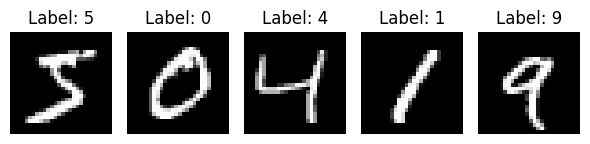

In [4]:
# visualizing first few images in the training set

import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,5,figsize=(6,2))
for i in range(5):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(f"Label: {y_train[i]}")
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Normalize (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape (28, 28) → (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [6]:
# Convert labels to categorical (one-hot encoding)
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# creating validation set

x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

In [8]:
# Model building and training 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model  = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))    

Epoch 1/3
1563/1563 [==============================] - 42s 26ms/step - loss: 0.1401 - accuracy: 0.9566 - val_loss: 0.0546 - val_accuracy: 0.9850
Epoch 2/3
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0512 - val_accuracy: 0.9850
Epoch 3/3
1563/1563 [==============================] - 68s 43ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0352 - val_accuracy: 0.9896


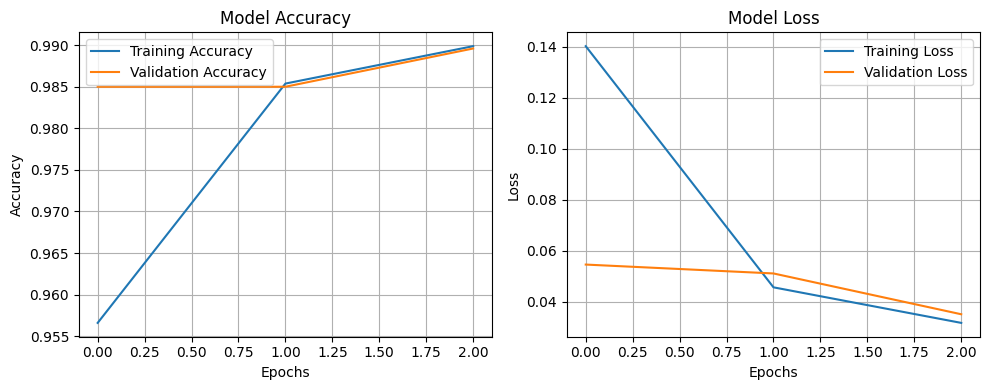

In [12]:
import matplotlib.pyplot as plt

# Create 1 row, 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

# Accuracy Plot
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Loss Plot
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [13]:
# Testing data evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0311 - accuracy: 0.9897
Test Loss: 0.031057162210345268, Test Accuracy: 0.9897000193595886


1/1 [==============================] - 0s 351ms/step


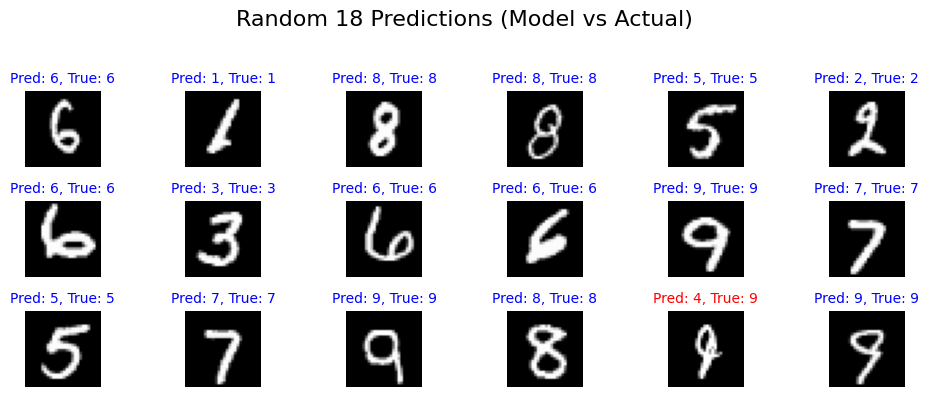

In [14]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Random 18 indices
random_indices = random.sample(range(len(x_test)), 18)
predictions = model.predict(x_test[random_indices])

# Create subplots
fig, axes = plt.subplots(3, 6, figsize=(10, 4))
fig.suptitle('Random 18 Predictions (Model vs Actual)', fontsize=16)

for i, idx in enumerate(random_indices):
    row = i // 6
    col = i % 6
    ax = axes[row, col]
    ax.imshow(x_test[idx].squeeze(), cmap='gray')
    
    pred = np.argmax(predictions[i])
    actual = np.argmax(y_test[idx])

    ax.set_title(f"Pred: {pred}, True: {actual}", fontsize=10, color='blue' if pred == actual else 'red')
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
model.save("mnist_cnn_model.keras")
